# Sequential k-means Clustering

In [58]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


In [59]:
# load iris dataset
iris = load_iris()
iris_data = iris.data
iris_data = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_data['target'] = iris.target
iris_data.head(15)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [60]:
class SequentialKMeans:
    def __init__(self, k, data):
        self.k = k
        self.data = data
        self.centroids = self.data.iloc[:self.k, :-1]
        self.counts = [1] * self.k
        self.data = self.data.iloc[self.k:, :]
        self.data = self.data.reset_index(drop=True)
        self.data['target'] = self.data['target'].astype('int')

    def update(self):
        for i in range(len(self.data)):
            x = self.data.iloc[i, :-1]
            x = np.array(x)
            x = x.reshape(1, -1)
            distances = []
            for j in range(self.k):
                centroid = self.centroids.iloc[j, :]
                centroid = np.array(centroid)
                centroid = centroid.reshape(1, -1)
                distance = np.linalg.norm(x - centroid)
                distances.append(distance)
            closest_centroid = np.argmin(distances)
            self.counts[closest_centroid] += 1
            self.centroids.iloc[closest_centroid, :] = self.centroids.iloc[closest_centroid, :] + (1/self.counts[closest_centroid])*(self.data.iloc[i, :-1] - self.centroids.iloc[closest_centroid, :])
        return self.centroids


In [61]:
# clustering
skm = SequentialKMeans(3, iris_data)
cluster_centroids = skm.update()
print(cluster_centroids)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           6.070968          3.034677           4.243548          1.401613
1           4.920000          3.200000           1.526667          0.253333
2           4.536364          3.118182           1.327273          0.209091


d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-pa

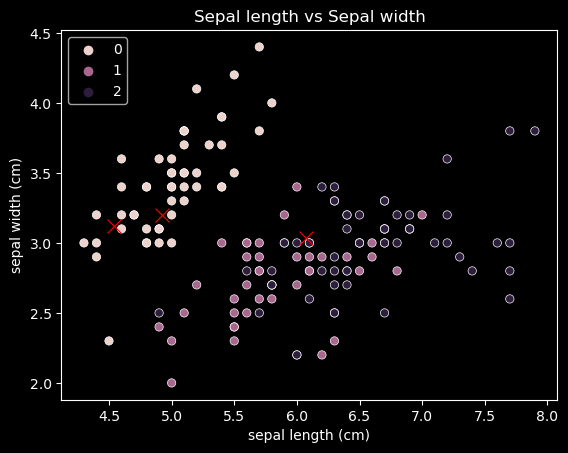

In [62]:
# plot the clusters
sepal_data = iris_data[['sepal length (cm)', 'sepal width (cm)']]
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = sepal_data, hue = iris_data['target'])
x = cluster_centroids['sepal length (cm)']
y = cluster_centroids['sepal width (cm)']
sns.scatterplot(x = x, y = y, color = 'red', s = 100, marker = 'x', palette = 'Set2')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal length vs Sepal width')
plt.legend(loc = 'upper left')
plt.show()


In [63]:
# sklearn k-means
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(sepal_data)
print("Cluster centroids from sklearn k-means")
print(kmeans.cluster_centers_)


d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centroids from sklearn k-means
[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]]


d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\anaconda3\Lib\site-pa

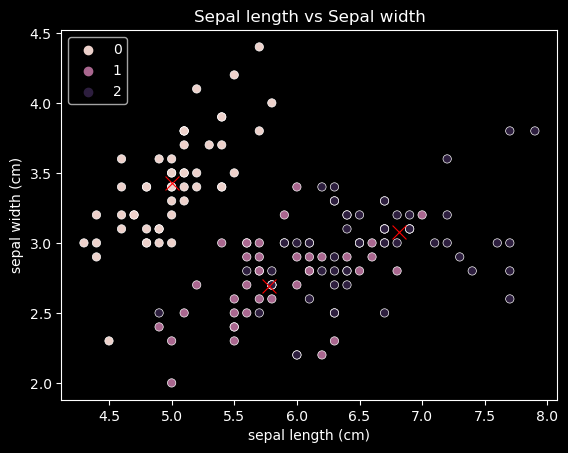

In [64]:
# plot the clusters
sepal_data = iris_data[['sepal length (cm)', 'sepal width (cm)']]
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = sepal_data, hue = iris_data['target'])
x = kmeans.cluster_centers_[:, 0]
y = kmeans.cluster_centers_[:, 1]
sns.scatterplot(x = x, y = y, color = 'red', s = 100, marker = 'x', palette = 'Set2')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal length vs Sepal width')
plt.legend(loc = 'upper left')
plt.show()
